C:\Users\15529\AppData\Local\Temp\ipykernel_47864\3792991082.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


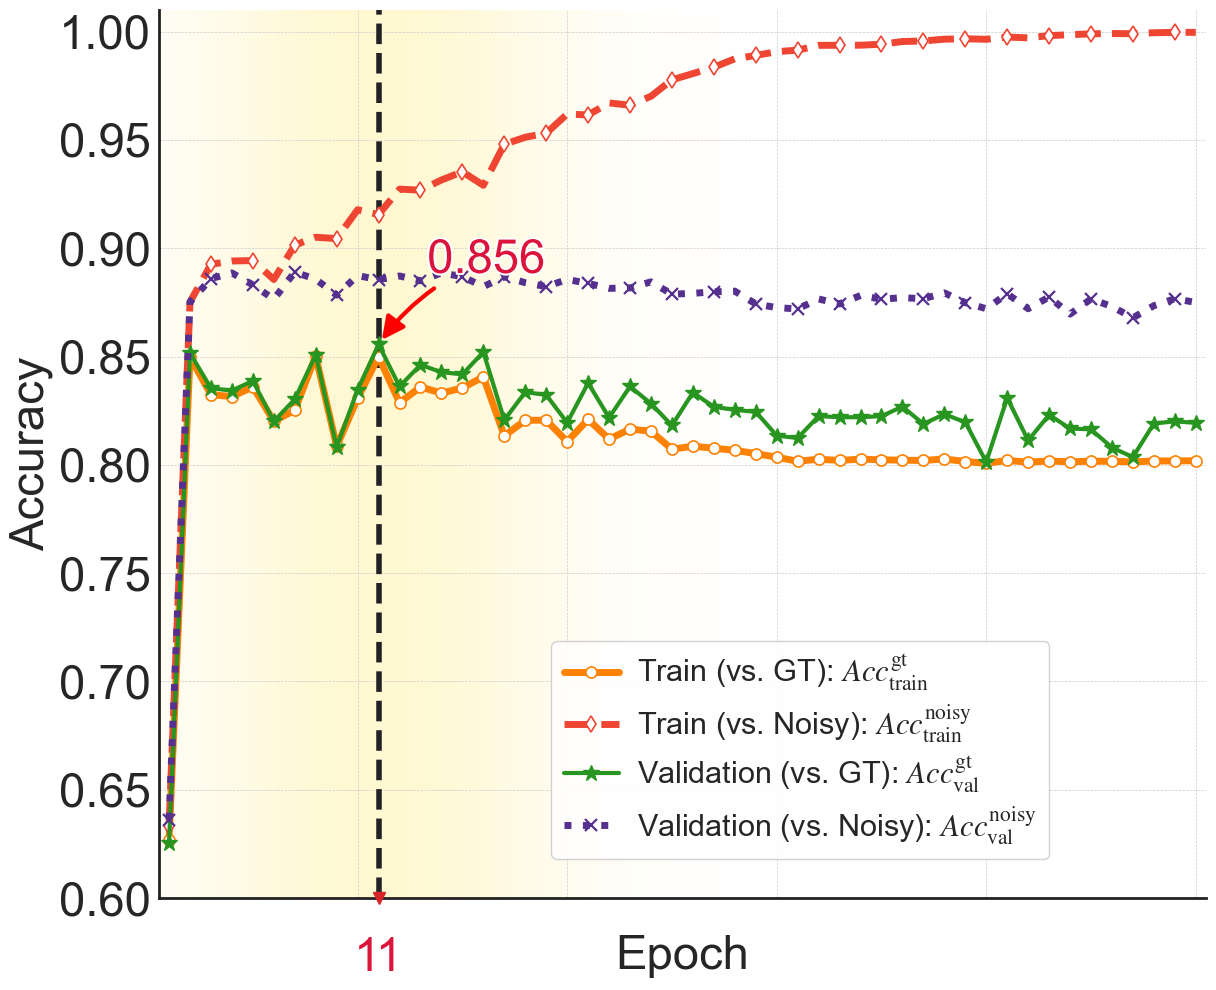

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# --- 0) 读数据 ---
# !!! 请确保这个文件路径在您的本地环境中是正确的 !!!
file_path = './results/human-middle.csv' 
df = pd.read_csv(file_path)

# 只画前 n 个点
n_points = 50
df_sub = df.iloc[:n_points].copy()

# 横轴从 1 开始
x = np.arange(1, len(df_sub) + 1)

# 寻找最佳点
best_pos = int(df_sub['val_acc_gt'].values.argmax()) + 1
max_val_acc = float(df_sub['val_acc_gt'].max())

# --- A) 统一字号控制 ---
LLLLL = 30
SIZES = {
    "title": 16,
    "label": LLLLL + 4,
    "tick": LLLLL + 4,
    "legend": 22,
    "annot": LLLLL + 4,
}

# --- B) 全局字体与参数设置 ---
mpl.rcParams.update({
    "font.sans-serif": ["Times New Roman", "Noto Sans CJK SC", "Microsoft YaHei", "DejaVu Sans"],
    "axes.unicode_minus": False,
    "axes.titlesize": SIZES["title"],
    "axes.labelsize": SIZES["label"],
    "xtick.labelsize": SIZES["tick"],
    "ytick.labelsize": SIZES["tick"],
    "legend.fontsize": SIZES["legend"],
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
})

# --- C) 开始绘图 ---
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 10), dpi=100)

# 统一参数
LW = 5.0  # 线宽
MS = 8    # 标记大小

# --- D) 绘制核心曲线 (已修正图例标签的字体问题) ---
ax.plot(x, df_sub['train_acc_gt'].values,
        c='#FD8103', linestyle='-', marker='o',
        lw=LW, ms=MS, mfc='white', mec='#FD8103', mew=1.2,
        label=r'Train (vs. GT): $Acc_{\mathrm{train}}^{\mathrm{gt}}$')

ax.plot(x, df_sub['train_acc_noisy'].values,
        c='#EF4633', linestyle='--', marker='d',
        lw=LW, ms=MS, mfc='white', mec='#EF4633', mew=1.2,
        markevery=2, label=r'Train (vs. Noisy): $Acc_{\mathrm{train}}^{\mathrm{noisy}}$')

ax.plot(x, df_sub['val_acc_gt'].values,
        c='#279520', linestyle='-', marker='*',
        lw=3, ms=12,
        label=r'Validation (vs. GT): $Acc_{\mathrm{val}}^{\mathrm{gt}}$')

ax.plot(x, df_sub['val_acc_noisy'].values,
        c='#55308E', linestyle=':', marker='x',
        lw=LW, ms=MS, mew=1.6,
        markevery=2, label=r'Validation (vs. Noisy): $Acc_{\mathrm{val}}^{\mathrm{noisy}}$')

# --- E) 绘制背景、标注等视觉元素 ---
ax.set_xlim(0.5, len(x) + 0.5)
ax.set_ylim(0.6, 1.01)
y0, y1 = ax.get_ylim()

nx = 1500
xs = np.linspace(0.5, len(x) + 0.5, nx)
sigma = len(x) * 0.12
w = np.exp(-0.5 * ((xs - best_pos) / sigma)**2)
overlay = np.tile(w, (2, 1))
cmap_spot = LinearSegmentedColormap.from_list("white_to_soft_yellow", ["#FFFFFF", "#FFF8CC"])
ax.imshow(overlay, extent=(0.5, len(x) + 0.5, y0, y1),
          cmap=cmap_spot, aspect='auto', alpha=0.9, zorder=0, interpolation="bicubic")

import matplotlib.patheffects as pe
vline = ax.axvline(best_pos, color="#222", lw=4, ls="--", zorder=1, label="_nolegend_")
vline.set_path_effects([pe.withStroke(linewidth=4, foreground="white")])

ax.plot([best_pos], [y0], marker="v", markersize=9, color="#d62728", clip_on=False, zorder=5)

best_label = f"{best_pos}"
ax.annotate(
    best_label,
    xy=(best_pos, y0), xycoords='data',
    xytext=(0, -28), textcoords='offset points',
    ha='center', va='top',
    fontsize=SIZES["annot"], color='crimson',
    annotation_clip=False,
    zorder=10
)

ticks = ax.get_xticks()
labels = ax.get_xticklabels()
for i, t in enumerate(ticks):
    if np.isclose(t, best_pos):
        labels[i].set_visible(False)
        break
ax.set_xticklabels(labels)

ann = ax.annotate(
    f'{max_val_acc:.3f}',
    xy=(best_pos, max_val_acc), xycoords='data',
    xytext=(35, 45), textcoords='offset points',
    ha='left', va='bottom',
    color='crimson', fontsize=SIZES["annot"],
    arrowprops=dict(arrowstyle='-|>', color='red', lw=3,
                  connectionstyle='arc3,rad=0.15', shrinkA=4, shrinkB=4),
    zorder=10, clip_on=False
)
ann.set_path_effects([pe.withStroke(linewidth=3, foreground="white")])

for side in ["top", "right"]:
    ax.spines[side].set_visible(False)
for side in ["bottom", "left"]:
    ax.spines[side].set_linewidth(2.0)
    ax.spines[side].set_color("#222")

ax.set_xlabel('Epoch', fontsize=SIZES["label"], labelpad=15)
ax.set_ylabel('Accuracy', fontsize=SIZES["label"], labelpad=4)
ax.tick_params(axis='x', which='major', labelsize=SIZES["tick"], pad=8)
ax.tick_params(axis='y', which='major', labelsize=SIZES["tick"], pad=2)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# --- F) 图例 ---
leg = ax.legend(
    loc='upper left',
    bbox_to_anchor=(0.375, 0.29),
    framealpha=0.9, fancybox=True,
    fontsize=SIZES["legend"],
    borderaxespad=0.,
    handlelength=1.8,
    handletextpad=0.6,
    labelspacing=0.3,
    borderpad=0.4,
    columnspacing=1.0
)

# --- G) 最终布局与显示 ---
fig.tight_layout()
plt.savefig("final_plot_optimized.png", dpi=300, bbox_inches="tight")
plt.show()

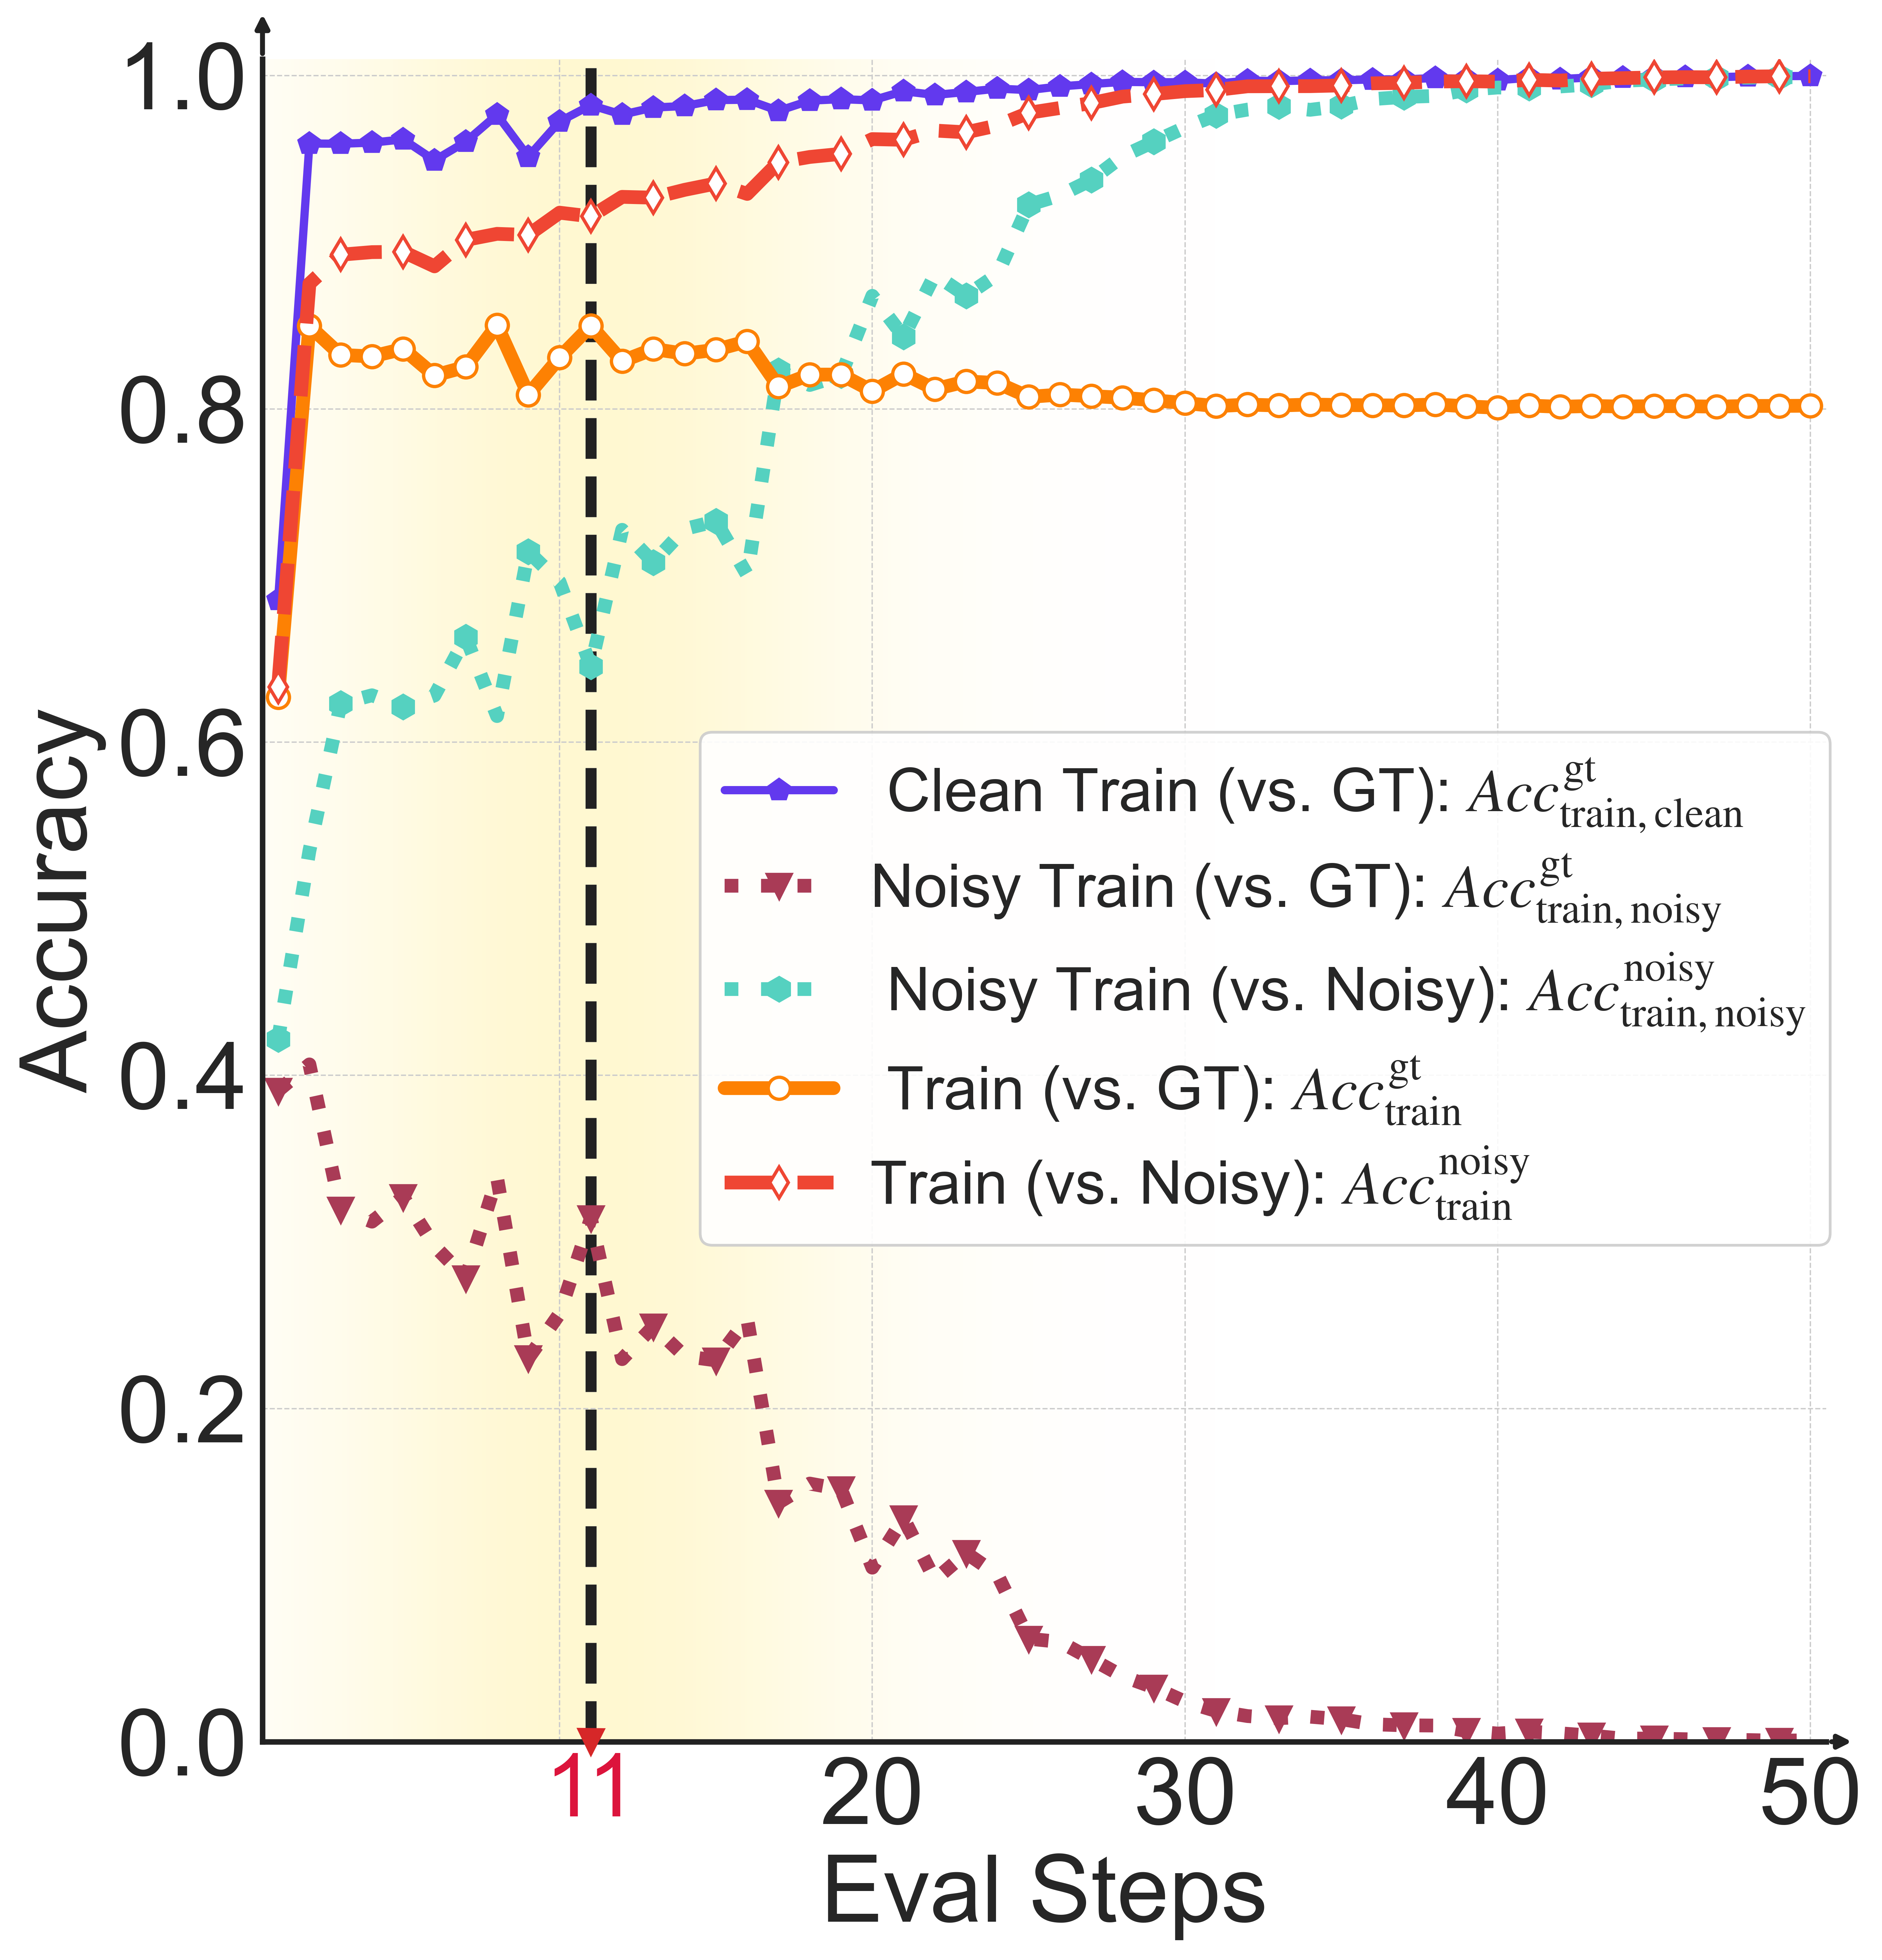

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# --- 0) 读数据 ---
file_path = './results/human-middle.csv'
df = pd.read_csv(file_path)

# 只画前 n 个点
n_points = 50
df_sub = df.iloc[:n_points].copy()

# 横轴从 1 开始，彻底去掉左侧 0
x = np.arange(1, len(df_sub) + 1)

# 子集内最佳点（用新的横轴位置）
best_pos = int(df_sub['val_acc_gt'].values.argmax()) + 1

# -------- A) 统一字号控制（按需改动即可） --------
LLLLL = 30
SIZES = {
    "title": 16,   # 主标题
    "label": LLLLL+4,   # 坐标轴标签
    "tick":  LLLLL+4,   # 刻度文字
    "legend":22,   # 图例
    "annot": LLLLL + 2,   # 注释
}

# 全局字体/导出参数（保持你的配色与风格，不动颜色）
mpl.rcParams.update({
    "font.sans-serif": ["Times New Roman", "Noto Sans CJK SC", "Microsoft YaHei", "DejaVu Sans"],
    "axes.unicode_minus": False,
    "axes.titlesize":   SIZES["title"],
    "axes.labelsize":   SIZES["label"],
    "xtick.labelsize":  SIZES["tick"],
    "ytick.labelsize":  SIZES["tick"],
    "legend.fontsize":  SIZES["legend"],
    "pdf.fonttype": 42,  # 论文导出更友好
    "ps.fonttype": 42,
    
})

# --- 2) 风格 ---
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 10), dpi=600)

# 统一参数
LW = 5.0     # 线宽
MS = 8       # 标记大小


ax.plot(x, df_sub['train_clean_acc'].values,   # 固定用 *
        c='#6239EE', linestyle='-', marker='p',
        lw=3, ms=8,                      # 星号较重→线略细、点稍大
        label=r' Clean Train (vs. GT): $Acc_{\mathrm{train,clean}}^{\mathrm{gt}}$')

ax.plot(x, df_sub['train_noisy_gt_acc'].values,
        c='#A93B56', linestyle=':', marker='v',
        lw=LW, ms=MS, mew=1.6,             # 'x' 是线型标记→用 mew 调粗笔画
        markevery=2, label=r'Noisy Train (vs. GT): $Acc_{\mathrm{train,noisy}}^{\mathrm{gt}}$')

ax.plot(x, df_sub['train_noisy_nl_acc'].values,
        c='#55D1C0', linestyle=':', marker='h',
        lw=LW, ms=MS, mew=1.6,             # 'x' 是线型标记→用 mew 调粗笔画
        markevery=2, label=r' Noisy Train (vs. Noisy): $Acc_{\mathrm{train,noisy}}^{\mathrm{noisy}}$')

# Clean 用实线，Noisy 用更弱的虚线/点线；'*' 属于重标记，线略细
ax.plot(x, df_sub['train_acc_gt'].values,
        c='#FD8103', linestyle='-', marker='o',
        lw=LW, ms=MS, mfc='white', mec='#FD8103', mew=1.2,
        label=r' Train (vs. GT): $Acc_{\mathrm{train}}^{\mathrm{gt}}$')

ax.plot(x, df_sub['train_acc_noisy'].values,
        c='#EF4633', linestyle='--', marker='d',
        lw=LW, ms=MS, mfc='white', mec='#EF4633', mew=1.2,
        markevery=2, label=r'Train (vs. Noisy): $Acc_{\mathrm{train}}^{\mathrm{noisy}}$' )


# 轴范围：去掉左右无用留白
ax.set_xlim(0.5, len(x) + 0.5)
ax.set_ylim(0.0, 1.01)
y0, y1 = ax.get_ylim()
# --- 4) 背景聚光灯 + 竖线（保持你的实现） ---
nx = 1500
xs = np.linspace(0.5, len(x)+0.5, nx)
sigma = len(x) * 0.12
w = np.exp(-0.5*((xs - best_pos)/sigma)**2)
overlay = np.tile(w, (2,1))

cmap_spot = LinearSegmentedColormap.from_list("white_to_soft_yellow", ["#FFFFFF", "#FFF8CC"])
ax.imshow(overlay, extent=(0.5, len(x)+0.5, 0, y1),
          cmap=cmap_spot, aspect='auto', alpha=0.9, zorder=0, interpolation="bicubic")


import matplotlib.patheffects as pe
vline = ax.axvline(best_pos, color="#222", lw=4, ls="--", zorder=1, label="_nolegend_")
vline.set_path_effects([pe.withStroke(linewidth=4, foreground="white")])

# x 轴上的三角指示
ax.plot([best_pos], [0], marker="v", markersize=9, color="#d62728",
        transform=ax.get_xaxis_transform(), clip_on=False, zorder=5)
# 也可以把你底部的 "best @ {best_pos}" 文本保持为红色，与三角一致


# —— 在 x 轴下方标注 best 的步数（不与数据区重叠）——
best_label = f"{best_pos}"

from matplotlib.ticker import FuncFormatter
to_remove = {10}
tol = 0.4

def fmt(x, pos):
    return "" if any(abs(x - r) < tol for r in to_remove) else f"{int(x)}"
ax.xaxis.set_major_formatter(FuncFormatter(fmt))


# x 轴右端箭头（轴域分数坐标，更稳）
ax.annotate("",
    xy=(1.02, 0.0), xycoords="axes fraction",    # 终点在轴外一点
    xytext=(1.0, 0.0), textcoords="axes fraction",
    arrowprops=dict(arrowstyle="-|>", color="#222", lw=1.8),
    annotation_clip=False, zorder=5
)
# y 轴上端箭头
ax.annotate("",
    xy=(0.0, 1.03), xycoords="axes fraction",
    xytext=(0.0, 1.0), textcoords="axes fraction",
    arrowprops=dict(arrowstyle="-|>", color="#222", lw=1.8),
    annotation_clip=False, zorder=5
)
# 预留一点边距，避免箭头被裁剪（按需要调小/调大）
plt.gcf().subplots_adjust(left=0.12, bottom=0.14)


# 1) 标注：x 用数据坐标，y 用轴域分数(0~1)，再向下偏移若干像素
ax.annotate(
    best_label,
    xy=(best_pos, 0), xycoords=('data', 'axes fraction'),  # y=0 在轴底部
    xytext=(0, -4), textcoords='offset points',           # 向下 24px，可调
    ha='center', va='top',
    fontsize=SIZES["annot"], color='crimson',
    
    annotation_clip=False,  # 允许绘制在轴外
    zorder=10
)

# 2) 预留底部空间，避免被裁剪
plt.gcf().subplots_adjust(bottom=0.18)   # 可按需要调成 0.15~0.22

# 3) 如果 best_pos 正好是一个主刻度，隐藏该刻度的原始数字，避免重叠
ticks = ax.get_xticks()
labels = ax.get_xticklabels()
for i, t in enumerate(ticks):
    if np.isclose(t, best_pos):
        labels[i].set_visible(False)     # 只隐藏文字，不动刻度线
        break


# --- 5) 注释（改用统一字号） ---
ymin, ymax = ax.get_ylim()
span = len(x)
near_left  = (best_pos - 1) < 0.25 * span
near_right = (len(x) - best_pos) < 0.25 * span
dx = 48 if near_left else (-58 if near_right else 48)
dy = -32 if max_val_acc > ymin + 0.7 * (ymax - ymin) else 32


import matplotlib.patheffects as pe


# 给文字加一圈白边，提升可读性
ann.set_path_effects([pe.withStroke(linewidth=3, foreground="white")])
# 轴线：仅保留左/下，且加粗加黑
for side in ["top", "right"]:
    ax.spines[side].set_visible(False)
for side in ["bottom", "left"]:
    ax.spines[side].set_linewidth(2.0)
    ax.spines[side].set_color("#222")
# --- 6) 标题与坐标轴标签（统一字号 + 间距） ---
# ax.set_title(' laerning', fontsize=SIZES["title"], pad=8)
ax.set_xlabel('Eval Steps', fontsize=SIZES["label"], labelpad=4)
ax.set_ylabel('Accuracy', fontsize=SIZES["label"], labelpad=4)
# 刻度文字与间距
ax.tick_params(axis='x', which='major', labelsize=SIZES["tick"], pad=2)
ax.tick_params(axis='y', which='major', labelsize=SIZES["tick"], pad=2)
# 若你有次刻度，可单独设置（这里没有单独添加次刻度）
ax.tick_params(axis='both', which='minor', labelsize=max(SIZES["tick"]-1, 8))
# 网格（保持你的样式）
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# --- 7) 图例（统一字号 + 细节间距） ---
leg = ax.legend(
    loc='upper left',
    bbox_to_anchor=(0.28, 0.6),
    framealpha=0.9, fancybox=True,
    fontsize=SIZES["legend"],
    borderaxespad=0.,
    handlelength=1.8,   # 线段长度
    handletextpad=0.6,  # 线段与文字间距
    labelspacing=0.3,   # 行距
    borderpad=0.4,      # 框与内容内边距
    columnspacing=1.0
)
# 给右侧图例腾空间
fig.tight_layout(rect=[0, 0, 0.80, 1])
# 保存或显示
# plt.savefig("plot_1_subset_dynamics_with_max_annotation.png", dpi=300, bbox_inches="tight")
plt.show()


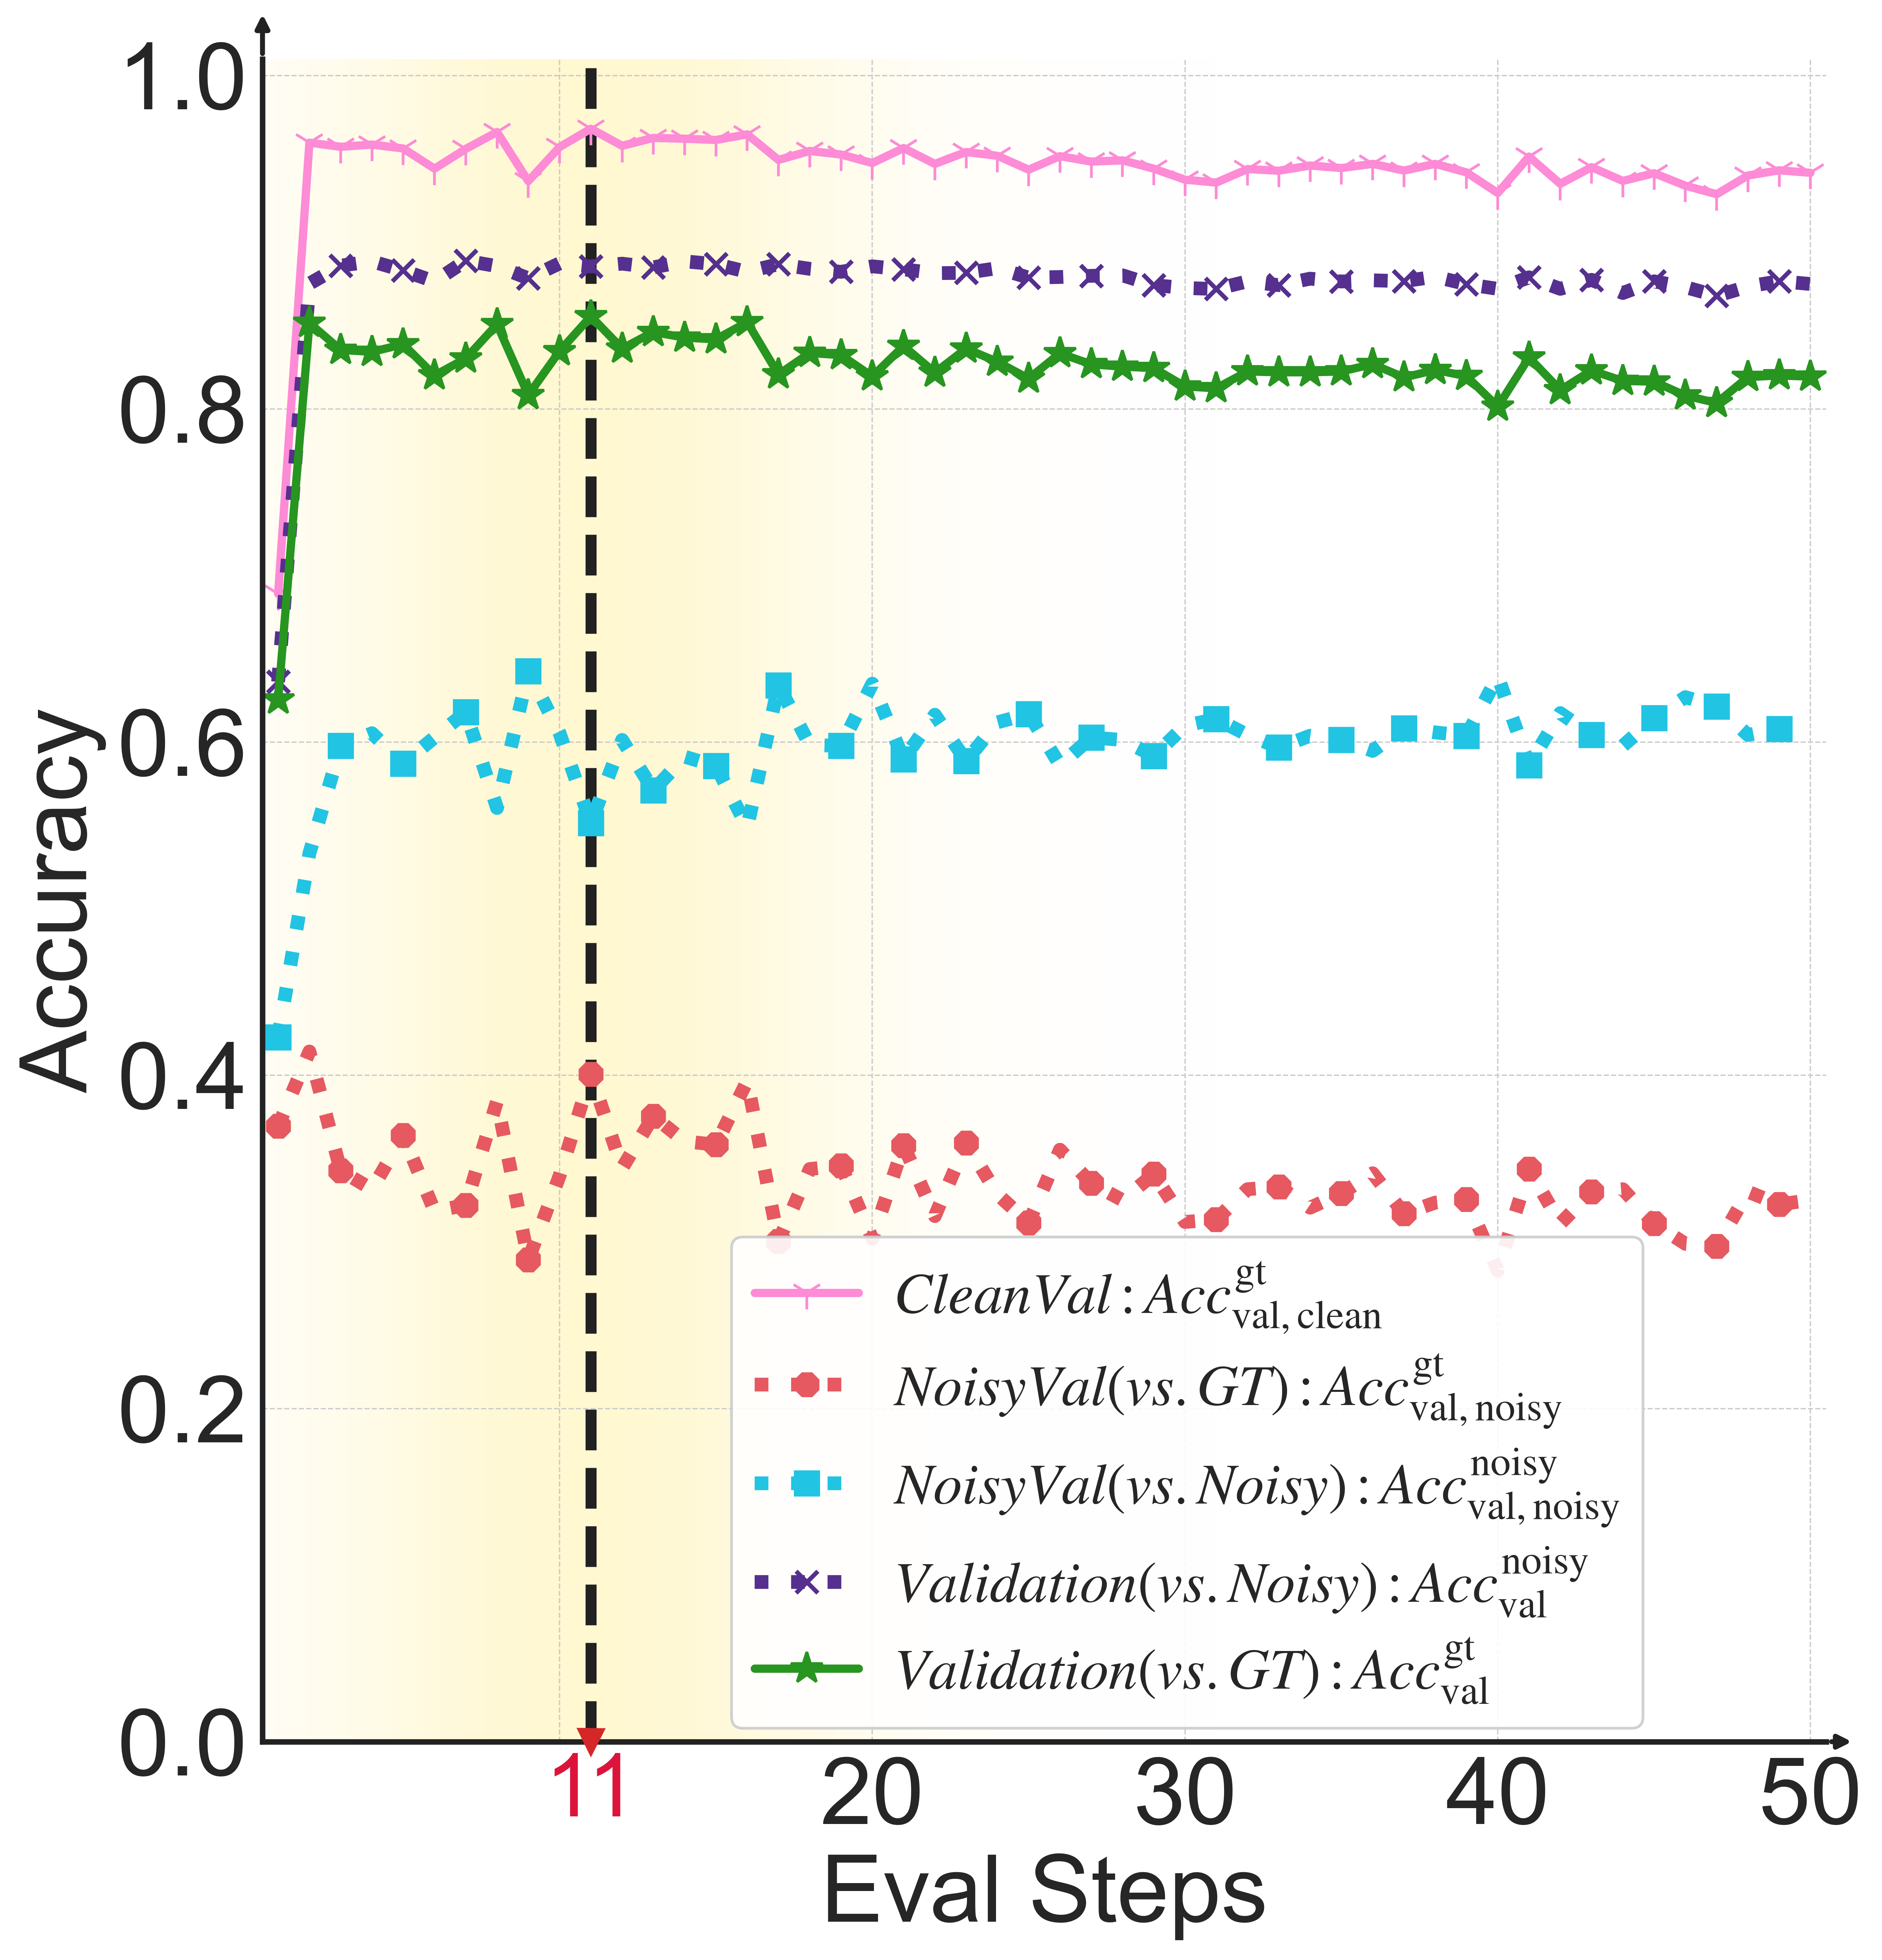

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# --- 0) 读数据 ---
file_path = './results/human-middle.csv'
df = pd.read_csv(file_path)

# 只画前 n 个点
n_points = 50
df_sub = df.iloc[:n_points].copy()

# 横轴从 1 开始，彻底去掉左侧 0
x = np.arange(1, len(df_sub) + 1)

# 子集内最佳点（用新的横轴位置）
best_pos = int(df_sub['val_acc_gt'].values.argmax()) + 1

# -------- A) 统一字号控制（按需改动即可） --------
LLLLL = 30
SIZES = {
    "title": 16,   # 主标题
    "label": LLLLL+4,   # 坐标轴标签
    "tick":  LLLLL+4,   # 刻度文字
    "legend":21,   # 图例
    "annot": LLLLL + 2,   # 注释
}

# 全局字体/导出参数（保持你的配色与风格，不动颜色）
mpl.rcParams.update({
    "font.sans-serif": ["Times New Roman", "Noto Sans CJK SC", "Microsoft YaHei", "DejaVu Sans"],
    "axes.unicode_minus": False,
    "axes.titlesize":   SIZES["title"],
    "axes.labelsize":   SIZES["label"],
    "xtick.labelsize":  SIZES["tick"],
    "ytick.labelsize":  SIZES["tick"],
    "legend.fontsize":  SIZES["legend"],
    "pdf.fonttype": 42,  # 论文导出更友好
    "ps.fonttype": 42,
    
})

# --- 2) 风格 ---
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 10), dpi=600)

# 统一参数
LW = 5.0     # 线宽
MS = 8       # 标记大小


# Clean 用实线，Noisy 用更弱的虚线/点线；'*' 属于重标记，线略细



ax.plot(x, df_sub['val_clean_acc'].values,   # 固定用 *
        c='#FD8BD6', linestyle='-', marker='1',
        lw=3, ms=12,                      # 星号较重→线略细、点稍大
        label=r'$ Clean Val: Acc_{\mathrm{val,clean}}^{\mathrm{gt}}$')

ax.plot(x, df_sub['val_noisy_gt_acc'].values,
        c='#E65961', linestyle=':', marker='8',
        lw=LW, ms=MS, mew=1.6,             # 'x' 是线型标记→用 mew 调粗笔画
        markevery=2, label=r'$Noisy Val (vs. GT): Acc_{\mathrm{val,noisy}}^{\mathrm{gt}}$')

ax.plot(x, df_sub['val_noisy_nl_acc'].values,
        c='#21C4E3', linestyle=':', marker='s',
        lw=LW, ms=MS, mew=1.6,             # 'x' 是线型标记→用 mew 调粗笔画
        markevery=2, label=r'$ Noisy Val (vs. Noisy): Acc_{\mathrm{val,noisy}}^{\mathrm{noisy}}$')

ax.plot(x, df_sub['val_acc_noisy'].values,
        c='#55308E', linestyle=':', marker='x',
        lw=LW, ms=MS, mew=1.6,             # 'x' 是线型标记→用 mew 调粗笔画
        markevery=2, label=r'$Validation (vs. Noisy): Acc_{\mathrm{val}}^{\mathrm{noisy}}$')

ax.plot(x, df_sub['val_acc_gt'].values,   # 固定用 *
        c='#279520', linestyle='-', marker='*',
        lw=3, ms=12,                      # 星号较重→线略细、点稍大
        label=r'$Validation (vs. GT): Acc_{\mathrm{val}}^{\mathrm{gt}}$')


# 轴范围：去掉左右无用留白
ax.set_xlim(0.5, len(x) + 0.5)
ax.set_ylim(0.0, 1.01)
y0, y1 = ax.get_ylim()
# --- 4) 背景聚光灯 + 竖线（保持你的实现） ---
nx = 1500
xs = np.linspace(0.5, len(x)+0.5, nx)
sigma = len(x) * 0.12
w = np.exp(-0.5*((xs - best_pos)/sigma)**2)
overlay = np.tile(w, (2,1))

cmap_spot = LinearSegmentedColormap.from_list("white_to_soft_yellow", ["#FFFFFF", "#FFF8CC"])
ax.imshow(overlay, extent=(0.5, len(x)+0.5, 0, y1),
          cmap=cmap_spot, aspect='auto', alpha=0.9, zorder=0, interpolation="bicubic")


import matplotlib.patheffects as pe
vline = ax.axvline(best_pos, color="#222", lw=4, ls="--", zorder=1, label="_nolegend_")
vline.set_path_effects([pe.withStroke(linewidth=4, foreground="white")])

# x 轴上的三角指示
ax.plot([best_pos], [0], marker="v", markersize=9, color="#d62728",
        transform=ax.get_xaxis_transform(), clip_on=False, zorder=5)
# 也可以把你底部的 "best @ {best_pos}" 文本保持为红色，与三角一致


# —— 在 x 轴下方标注 best 的步数（不与数据区重叠）——
best_label = f"{best_pos}"

from matplotlib.ticker import FuncFormatter
to_remove = {10}
tol = 0.4

def fmt(x, pos):
    return "" if any(abs(x - r) < tol for r in to_remove) else f"{int(x)}"
ax.xaxis.set_major_formatter(FuncFormatter(fmt))


# x 轴右端箭头（轴域分数坐标，更稳）
ax.annotate("",
    xy=(1.02, 0.0), xycoords="axes fraction",    # 终点在轴外一点
    xytext=(1.0, 0.0), textcoords="axes fraction",
    arrowprops=dict(arrowstyle="-|>", color="#222", lw=1.8),
    annotation_clip=False, zorder=5
)
# y 轴上端箭头
ax.annotate("",
    xy=(0.0, 1.03), xycoords="axes fraction",
    xytext=(0.0, 1.0), textcoords="axes fraction",
    arrowprops=dict(arrowstyle="-|>", color="#222", lw=1.8),
    annotation_clip=False, zorder=5
)
# 预留一点边距，避免箭头被裁剪（按需要调小/调大）
plt.gcf().subplots_adjust(left=0.12, bottom=0.14)


# 1) 标注：x 用数据坐标，y 用轴域分数(0~1)，再向下偏移若干像素
ax.annotate(
    best_label,
    xy=(best_pos, 0), xycoords=('data', 'axes fraction'),  # y=0 在轴底部
    xytext=(0, -4), textcoords='offset points',           # 向下 24px，可调
    ha='center', va='top',
    fontsize=SIZES["annot"], color='crimson',
    
    annotation_clip=False,  # 允许绘制在轴外
    zorder=10
)

# 2) 预留底部空间，避免被裁剪
plt.gcf().subplots_adjust(bottom=0.18)   # 可按需要调成 0.15~0.22

# 3) 如果 best_pos 正好是一个主刻度，隐藏该刻度的原始数字，避免重叠
ticks = ax.get_xticks()
labels = ax.get_xticklabels()
for i, t in enumerate(ticks):
    if np.isclose(t, best_pos):
        labels[i].set_visible(False)     # 只隐藏文字，不动刻度线
        break


# --- 5) 注释（改用统一字号） ---
ymin, ymax = ax.get_ylim()
span = len(x)
near_left  = (best_pos - 1) < 0.25 * span
near_right = (len(x) - best_pos) < 0.25 * span
dx = 48 if near_left else (-58 if near_right else 48)
dy = -32 if max_val_acc > ymin + 0.7 * (ymax - ymin) else 32


import matplotlib.patheffects as pe


# 给文字加一圈白边，提升可读性
ann.set_path_effects([pe.withStroke(linewidth=3, foreground="white")])
# 轴线：仅保留左/下，且加粗加黑
for side in ["top", "right"]:
    ax.spines[side].set_visible(False)
for side in ["bottom", "left"]:
    ax.spines[side].set_linewidth(2.0)
    ax.spines[side].set_color("#222")
# --- 6) 标题与坐标轴标签（统一字号 + 间距） ---
# ax.set_title(' laerning', fontsize=SIZES["title"], pad=8)
ax.set_xlabel('Eval Steps', fontsize=SIZES["label"], labelpad=4)
ax.set_ylabel('Accuracy', fontsize=SIZES["label"], labelpad=4)
# 刻度文字与间距
ax.tick_params(axis='x', which='major', labelsize=SIZES["tick"], pad=2)
ax.tick_params(axis='y', which='major', labelsize=SIZES["tick"], pad=2)
# 若你有次刻度，可单独设置（这里没有单独添加次刻度）
ax.tick_params(axis='both', which='minor', labelsize=max(SIZES["tick"]-1, 8))
# 网格（保持你的样式）
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# --- 7) 图例（统一字号 + 细节间距） ---
leg = ax.legend(
    loc='upper left',
    bbox_to_anchor=(0.3, 0.3),
    framealpha=0.9, fancybox=True,
    fontsize=SIZES["legend"],
    borderaxespad=0.,
    handlelength=1.8,   # 线段长度
    handletextpad=0.6,  # 线段与文字间距
    labelspacing=0.3,   # 行距
    borderpad=0.4,      # 框与内容内边距
    columnspacing=1.0
)
# 给右侧图例腾空间
fig.tight_layout(rect=[0, 0, 0.80, 1])
# 保存或显示
# plt.savefig("plot_1_subset_dynamics_with_max_annotation.png", dpi=300, bbox_inches="tight")
plt.show()


In [8]:
file_path = './results/human-middle.csv'
df = pd.read_csv(file_path)

print(df.columns)

Index(['epoch', 'eval_idx', 'global_step', 'epoch_step', 'epoch_batches',
       'epoch_progress', 'train_acc_gt', 'train_acc_noisy', 'val_acc_gt',
       'val_acc_noisy', 'train_clean_acc', 'train_noisy_gt_acc',
       'train_noisy_nl_acc', 'val_clean_acc', 'val_noisy_gt_acc',
       'val_noisy_nl_acc'],
      dtype='object')


In [20]:
import pandas as pd
import numpy as np
from dataclasses import dataclass
from typing import Optional, Tuple, Dict, Any, Literal

# --------- 1) 小工具 ---------
def _first_consecutive_onset(mask: np.ndarray, k: int) -> Optional[int]:
    """
    返回第一个满足至少 k 个连续 True 的段的起始下标；若不存在则返回 None。
    """
    if k <= 1:
        return int(np.argmax(mask)) if mask.any() else None
    run = 0
    for i, v in enumerate(mask):
        run = run + 1 if v else 0
        if run >= k:
            return i - k + 1
    return None

def _longest_window_around_peak(a: np.ndarray, gamma: float) -> Tuple[int, int, int, int]:
    """
    以全局峰值为中心，向两侧扩展到 >= peak - gamma 的最长连续区间。
    返回: (start_idx, end_idx, length, peak_idx)
    """
    peak_idx = int(np.argmax(a))
    peak_val = float(a[peak_idx])
    thr = peak_val - gamma
    n = len(a)

    # 向左扩展
    L = peak_idx
    while L - 1 >= 0 and a[L - 1] >= thr:
        L -= 1
    # 向右扩展
    R = peak_idx
    while R + 1 < n and a[R + 1] >= thr:
        R += 1

    return L, R, (R - L + 1), peak_idx

# --------- 2) 结果结构 ---------
@dataclass
class MetricsResult:
    # Memorization onset
    t_onset_pos: Optional[int]               # 按位置（0..n-1）
    t_onset_eval_idx: Optional[int]          # 若有 eval_idx 列则返回其值
    epsilon: float
    k: int

    # Stability window
    W_gamma_len: int
    W_gamma_start_pos: int
    W_gamma_end_pos: int
    W_gamma_start_eval_idx: Optional[int]
    W_gamma_end_eval_idx: Optional[int]
    peak_pos: int
    peak_eval_idx: Optional[int]
    peak_val_acc_gt: float

    # Short-Plank
    short_plank_gap_at_peak: float
    short_plank_gap_windowed: float
    gap_mode: Literal["con_inc", "overall_inc"]

    # Windowed accuracy
    windowed_val_acc_gt: float

    # 便于调试的原始阈值
    gamma: float

# --------- 3) 主函数 ---------
def compute_four_metrics(
    df: pd.DataFrame,
    epsilon: float = 0.02,
    k: int = 3,
    gamma: float = 0.01,
    gap_mode: Literal["con_inc", "overall_inc"] = "con_inc",
    sort_by: Optional[str] = None,
) -> MetricsResult:
    """
    计算：t_onset、W_gamma、Delta_SP（两种口径）、windowed Acc_val^GT。

    参数
    ----
    df : 含有以下列的 DataFrame：
         ['epoch','eval_idx','global_step','epoch_step','epoch_batches','epoch_progress',
          'train_acc_gt','train_acc_noisy','val_acc_gt','val_acc_noisy',
          'train_clean_acc','train_noisy_gt_acc','train_noisy_nl_acc',
          'val_clean_acc','val_noisy_gt_acc','val_noisy_nl_acc']
    epsilon, k : t_onset 的阈值与最小连续步数
    gamma : 稳定窗口阈值
    gap_mode : "con_inc" -> val_clean_acc - val_noisy_gt_acc；
               "overall_inc" -> val_acc_gt - val_noisy_gt_acc
    sort_by : 若指定（如 'eval_idx' 或 'global_step'），先按此列升序排序

    返回
    ----
    MetricsResult 数据类
    """
    required = {
        'train_noisy_nl_acc', 'train_noisy_gt_acc',
        'val_acc_gt', 'val_clean_acc', 'val_noisy_gt_acc'
    }
    missing = [c for c in required if c not in df.columns]
    if missing:
        raise ValueError(f"缺少必要列: {missing}")

    # 排序（优先 eval_idx，其次 global_step），保证时间顺序正确
    if sort_by is None:
        if 'eval_idx' in df.columns:
            sort_by = 'eval_idx'
        elif 'global_step' in df.columns:
            sort_by = 'global_step'
    if sort_by is not None and sort_by in df.columns:
        df = df.sort_values(by=sort_by, kind="mergesort").reset_index(drop=True)

    # ---- 1) t_onset ----
    diff = df['train_noisy_nl_acc'].to_numpy() - df['train_noisy_gt_acc'].to_numpy()
    mask = diff >= epsilon
    onset_pos = _first_consecutive_onset(mask, k)
    onset_eval_idx = (int(df.loc[onset_pos, 'eval_idx'])
                      if onset_pos is not None and 'eval_idx' in df.columns else None)

    # ---- 2) 稳定窗口 W_gamma（围绕 val_acc_gt 的全局峰值）----
    val_gt = df['val_acc_gt'].to_numpy(dtype=float)
    wL, wR, wLen, peak_pos = _longest_window_around_peak(val_gt, gamma)
    peak_eval_idx = (int(df.loc[peak_pos, 'eval_idx']) if 'eval_idx' in df.columns else None)
    wL_eval = (int(df.loc[wL, 'eval_idx']) if 'eval_idx' in df.columns else None)
    wR_eval = (int(df.loc[wR, 'eval_idx']) if 'eval_idx' in df.columns else None)

    # ---- 3) Short-Plank gap ----
    if gap_mode == "con_inc":
        gap_series = df['val_clean_acc'] - df['val_noisy_gt_acc']
    else:  # "overall_inc"
        gap_series = df['val_acc_gt'] - df['val_noisy_gt_acc']

    short_plank_at_peak = float(gap_series.iloc[peak_pos])
    short_plank_windowed = float(gap_series.iloc[wL:wR+1].mean())

    # ---- 4) Windowed accuracy（在 W_gamma 内的平均 val_acc_gt）----
    windowed_val_acc = float(df['val_acc_gt'].iloc[wL:wR+1].mean())

    return MetricsResult(
        t_onset_pos=onset_pos,
        t_onset_eval_idx=onset_eval_idx,
        epsilon=epsilon,
        k=k,
        W_gamma_len=wLen,
        W_gamma_start_pos=wL,
        W_gamma_end_pos=wR,
        W_gamma_start_eval_idx=wL_eval,
        W_gamma_end_eval_idx=wR_eval,
        peak_pos=peak_pos,
        peak_eval_idx=peak_eval_idx,
        peak_val_acc_gt=float(val_gt[peak_pos]),
        short_plank_gap_at_peak=short_plank_at_peak,
        short_plank_gap_windowed=short_plank_windowed,
        gap_mode=gap_mode,
        windowed_val_acc_gt=windowed_val_acc,
        gamma=gamma,
    )

# --------- 4) 使用示例 ---------
if __name__ == "__main__":
    # 你的训练日志 CSV 路径
    csv_path = './results/noise_single_med.csv'
    df = pd.read_csv(csv_path)

    # 推荐参数：epsilon=0.02, k=3, gamma=0.01（或 0.005）
    res = compute_four_metrics(
        df,
        epsilon=0.05,
        k=3,
        gamma=0.02,
        gap_mode="con_inc",     # 若要用 overall_vs_inc 口径, 改成 "overall_inc"
        sort_by="eval_idx",     # 若没有 eval_idx，就用 "global_step" 或留空自动选择
    )

    # 打印结果（你也可以写入文件/表格）
    print("=== Memorization onset ===")
    print(f"t_onset (pos): {res.t_onset_pos}, t_onset (eval_idx): {res.t_onset_eval_idx}, "
          f"epsilon={res.epsilon}, k={res.k}")

    print("\n=== Stability window W_gamma ===")
    print(f"gamma={res.gamma}, length={res.W_gamma_len}, "
          f"start_pos={res.W_gamma_start_pos}, end_pos={res.W_gamma_end_pos}, "
          f"start_eval_idx={res.W_gamma_start_eval_idx}, end_eval_idx={res.W_gamma_end_eval_idx}")
    print(f"peak_pos={res.peak_pos}, peak_eval_idx={res.peak_eval_idx}, "
          f"peak val_acc_gt={res.peak_val_acc_gt:.4f}")

    print("\n=== Short-Plank gap ===")
    print(f"gap_mode={res.gap_mode}, at_peak={res.short_plank_gap_at_peak:.4f}, "
          f"windowed={res.short_plank_gap_windowed:.4f}")

    print("\n=== Windowed accuracy ===")
    print(f"mean val_acc_gt on W_gamma = {res.windowed_val_acc_gt:.4f}")


=== Memorization onset ===
t_onset (pos): 5, t_onset (eval_idx): 1, epsilon=0.05, k=3

=== Stability window W_gamma ===
gamma=0.02, length=12, start_pos=41, end_pos=52, start_eval_idx=5, end_eval_idx=8
peak_pos=48, peak_eval_idx=7, peak val_acc_gt=0.9292

=== Short-Plank gap ===
gap_mode=con_inc, at_peak=0.0117, windowed=0.0052

=== Windowed accuracy ===
mean val_acc_gt on W_gamma = 0.9202
